# Telecom Customer Churn Classification

### Importing Libraries

To proceed with the analysis, we need to import the essential libraries. These libraries provide the necessary tools and functions to manipulate, visualize, and analyze the dataset effectively. The following libraries will be imported for this purpose.

In [1]:
# importing libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df_cleaned = pd.read_csv('../data/Telco-Customer-Churn-processed.csv')
df_cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargeRatio,ServicesCount,HighRisk,PaymentMethodType
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,No,0-1yr,29.85,1,0,Manual
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,No,2-5yr,55.57,3,0,Manual
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,Yes,0-1yr,54.08,3,0,Manual
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,No,2-5yr,40.91,3,0,Automatic
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,Yes,0-1yr,75.83,1,1,Manual


## Feature Engineering 

In order to perform feature engineering, all the categorical column will be converted into numeric using appropriate encoding method.

In [3]:
df_cleaned.drop(['customerID'],axis = 1,inplace = True) # Drop unnecessary column

In [4]:
# Define feature groups
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'HighRisk',]
nominal_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'PaymentMethod', 'PaymentMethodType']
ordinal_features = ['Contract', 'TenureGroup']
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'ChargeRatio', 'ServicesCount']

# Binary Features encoding
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'HighRisk', 'Churn']
df_cleaned[binary_features] = df_cleaned[binary_features].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# Nominal Features encoding
nominal_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'PaymentMethod', 'PaymentMethodType']
df_cleaned = pd.get_dummies(df_cleaned, columns=nominal_features, drop_first=True)

# Ordinal Features encoding
contract_order = {'Month-to-month': 1, 'One year': 2, 'Two year': 3}
tenure_group_order = {'0-1yr': 1, '1-2yr': 2, '2-5yr': 3, '5+yr': 4}

df_cleaned['Contract'] = df_cleaned['Contract'].map(contract_order)
df_cleaned['TenureGroup'] = df_cleaned['TenureGroup'].map(tenure_group_order)
df_cleaned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethodType_Manual
0,0,0,1,0,1,0,1,1,29.85,29.85,...,0,0,0,0,0,0,0,1,0,1
1,1,0,0,0,34,1,2,0,56.95,1889.50,...,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,2,1,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,45,0,2,0,42.30,1840.75,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,2,1,1,1,70.70,151.65,...,0,0,0,0,0,0,0,1,0,1


In [5]:
# rewrite column name
df_cleaned.columns = df_cleaned.columns.str.replace(r'[^\w]', '_', regex=True)
df_cleaned.head().columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'TenureGroup', 'ChargeRatio', 'ServicesCount',
       'HighRisk', 'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No_internet_service', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_service', 'StreamingMovies_Yes',
       'PaymentMethod_Credit_card__automatic_',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check',
       'PaymentMethodType_Manual'],
      dtype='object')

Create a correlation matrix helps to visualize the relationship between features as well as with the target variable.

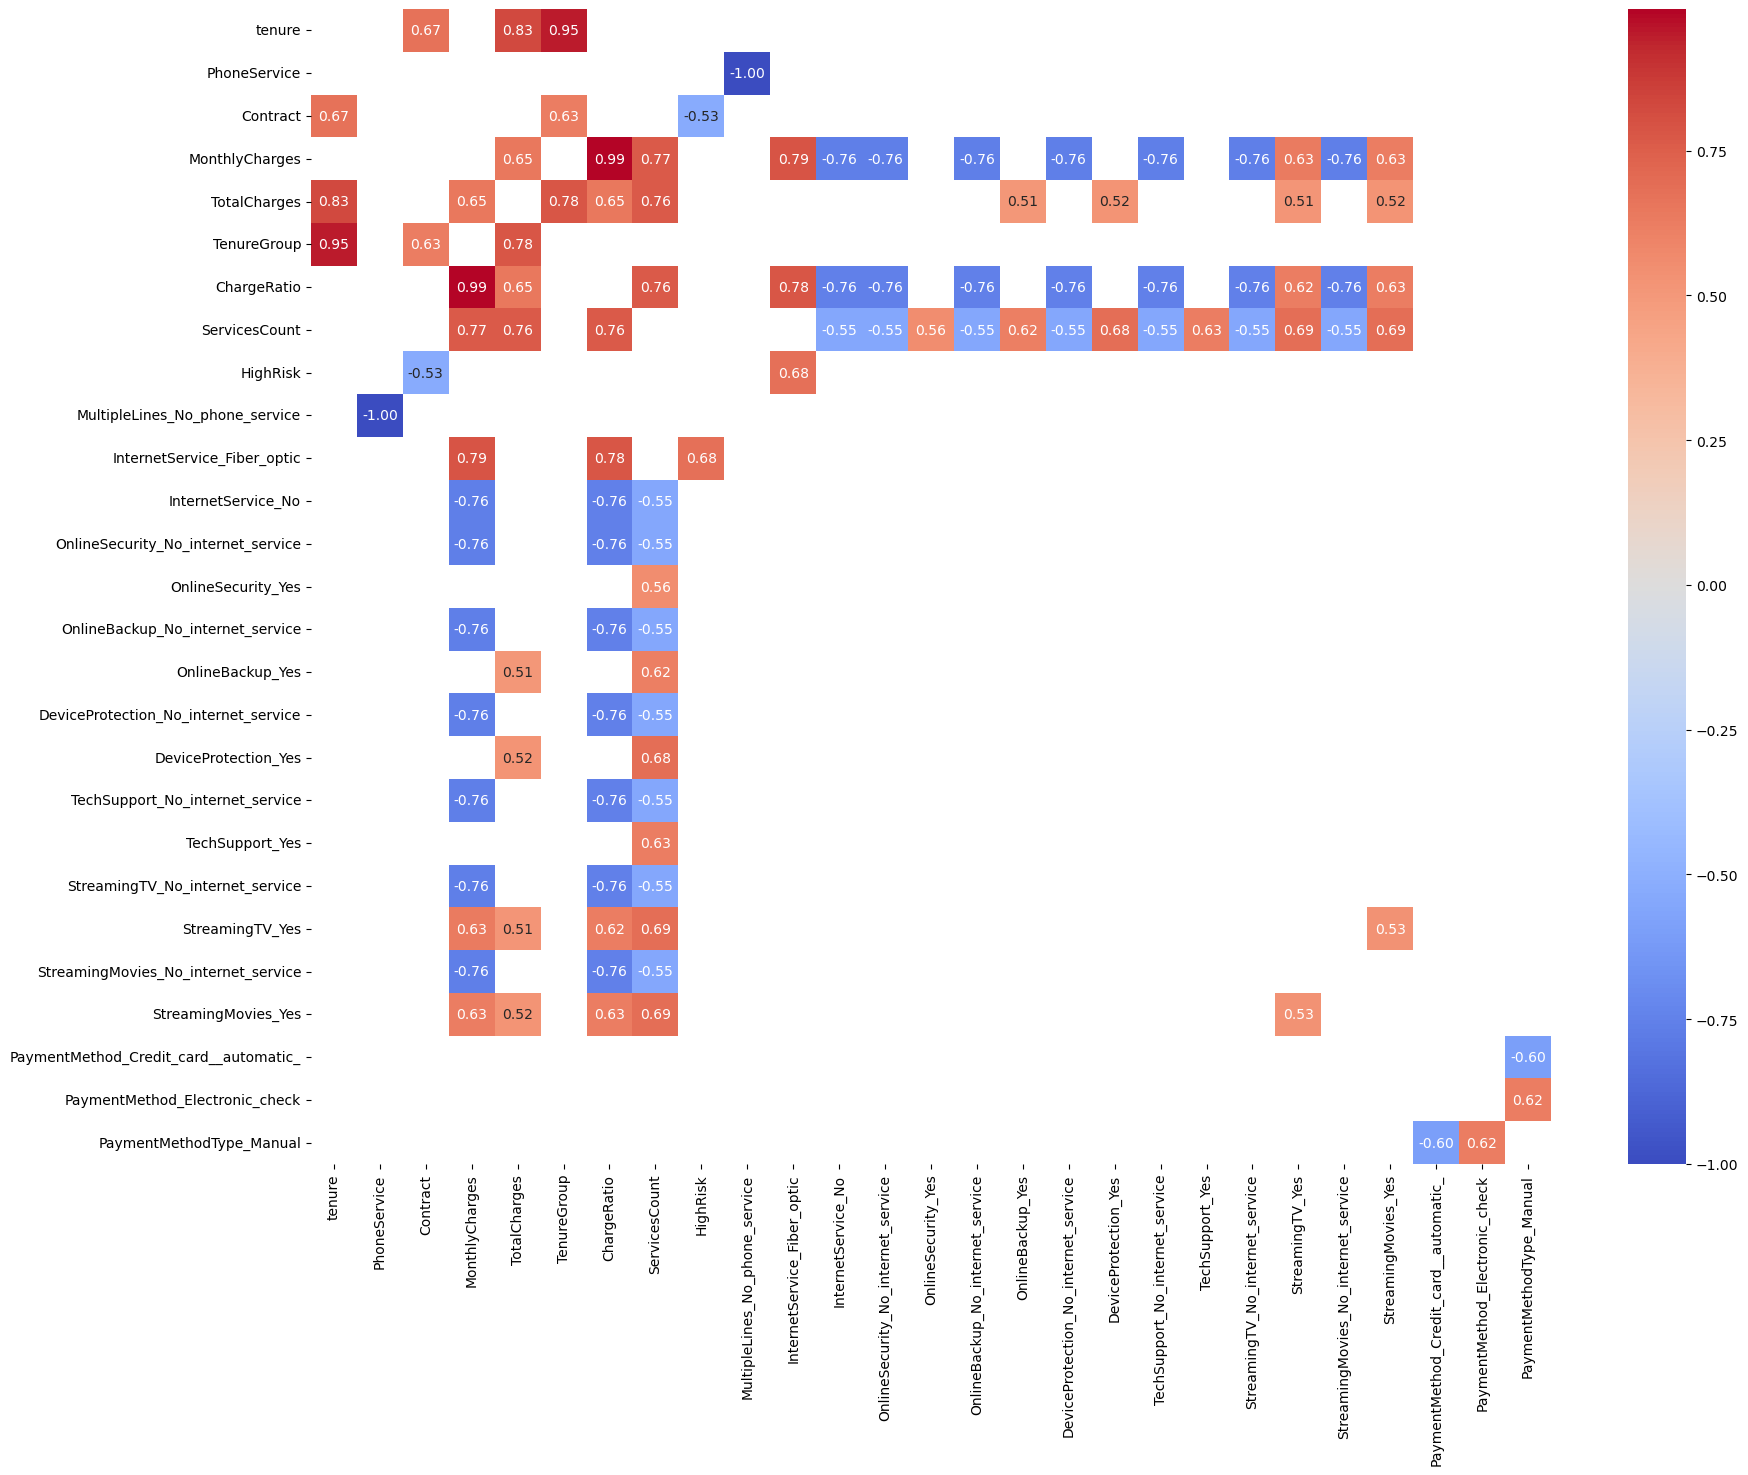

In [6]:
# create a correlation matrix
corr_matrix = df_cleaned.corr()

# filter correlations greater than 0.5
filtered_corr = corr_matrix[(corr_matrix.abs() > 0.5) & (corr_matrix != 1.0)]

# drop rows and columns where all values are NaN
filtered_corr = filtered_corr.dropna(how='all').dropna(axis=1, how='all')

# create a heatmap for the filtered correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(filtered_corr, annot=True, fmt='.2f', cmap='coolwarm', mask=filtered_corr.isnull())
plt.show()

**Key Insights from Correlation Matrix:**     

1. **Strong Positive Correlations:**
    - `tenure` and `TotalCharges` (0.826): Customers with longer tenure tend to have higher total charges.
    - `tenure` and `Contract` (0.672): Customers with longer tenure are more likely to have longer contracts.
    - `MonthlyCharges` and `ChargeRatio` (0.994): Monthly charges are almost perfectly correlated with the charge ratio.
    - `ServicesCount` and `MonthlyCharges` (0.766): Customers with more services tend to have higher monthly charges.
    - `InternetService_Fiber_optic` and `MonthlyCharges` (0.787): Customers with fiber optic internet service tend to have higher monthly charges.

2. **Strong Negative Correlations:**
    - `Contract` and `HighRisk` (-0.529): Customers with longer contracts are less likely to be high-risk.
    - `InternetService_No` and `MonthlyCharges` (-0.764): Customers without internet service tend to have lower monthly charges.
    - `OnlineSecurity_No internet_service` and `MonthlyCharges` (-0.764): Customers without online security service tend to have lower monthly charges.
    - `StreamingTV_No internet_service` and `MonthlyCharges` (-0.764): Customers without streaming TV service tend to have lower monthly charges.

3. **Churn Correlations:**
    - `HighRisk` and `Churn` (0.380): High-risk customers are more likely to churn.
    - `InternetService_Fiber_optic` and `Churn` (0.308): Customers with fiber optic internet service are more likely to churn.
    - `Contract` and `Churn` (-0.397): Customers with longer contracts are less likely to churn.
    - `tenure` and `Churn` (-0.352): Customers with longer tenure are less likely to churn.

4. **Other Notable Correlations:**
    - `ServicesCount` and `TotalCharges` (0.765): Customers with more services tend to have higher total charges.
    - `OnlineBackup_Yes` and `TotalCharges` (0.509): Customers with online backup service tend to have higher total charges.
    - `StreamingMovies_Yes` and `TotalCharges` (0.520): Customers with streaming movies service tend to have higher total charges.

These correlations help identify key factors that influence customer behavior, such as tenure, contract length, and the type of internet service. Understanding these relationships can guide strategies to reduce churn and improve customer retention.

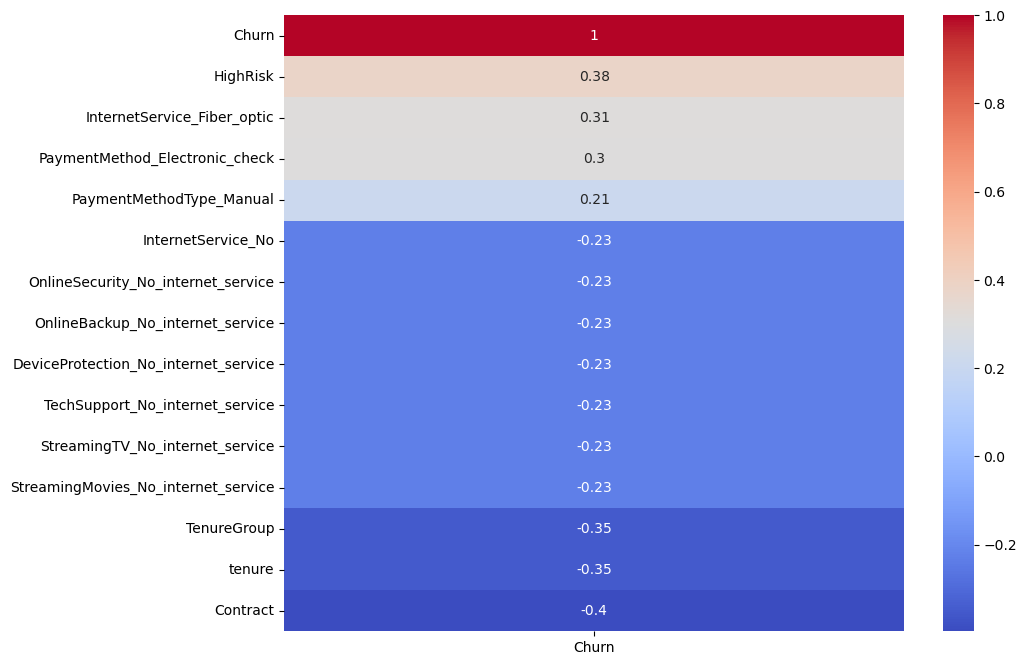

In [7]:
# plot correlation matrix with churn and filter with score 0.2
corr_matrix = df_cleaned.corr()
churn_filtered_corr = corr_matrix[['Churn']][corr_matrix['Churn'].abs() > 0.2].sort_values(by='Churn', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(churn_filtered_corr, annot=True, cmap='coolwarm')
plt.show()

**Key Insights on Churn:**  
- **Churn Drivers**: High-risk customers, fiber optic users, and electronic check payers are more likely to leave.  
- **Retention Factors**: Long-term contracts, loyal customers (longer tenure), and those without extra services (e.g., streaming) stay longer.  
- **Actions**: Target high-risk users, improve fiber service value, push for contract renewals, and simplify payment processes.  

## Data Scaling for Machine Learning Models:

In machine learning, ensuring uniformity in the interpretation of feature values is crucial. numerical features (`tenure`, `MonthlyCharges`, `TotalCharges`, `ServicesCount`) have different scales (e.g., MonthlyCharges in dollars vs. tenure in months). Scaling ensures they contribute equally to the model, preventing features with larger magnitudes (like `TotalCharges`) from dominating. This improves performance for algorithms sensitive to feature scales.

In [8]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
scale_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'ServicesCount']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale only the selected features
df_cleaned[scale_features] = scaler.fit_transform(df_cleaned[scale_features])
df_cleaned[scale_features].head()

,tenure,MonthlyCharges,TotalCharges,ServicesCount
0,-1.277445,-1.160323,-0.992611,-1.052777
1,0.066327,-0.259629,-0.172165,0.031958
2,-1.236724,-0.362660,-0.958066,0.031958
3,0.514251,-0.746535,-0.193672,0.031958
4,-1.236724,0.197365,-0.938874,-1.052777


In [9]:
# Save the scaler
import joblib
joblib.dump(scaler, '../frontend/model/standard-scaler.pkl')

['../frontend/model/standard-scaler.pkl']

## Feature Selection :

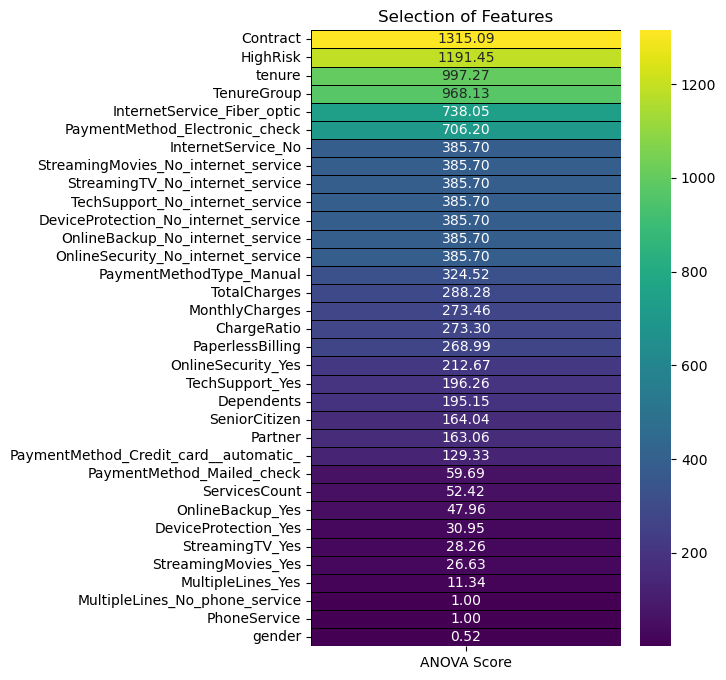

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define the features and target variable
filter_x = df_cleaned.drop(['Churn'], axis=1)
y = df_cleaned['Churn']

# Apply SelectKBest to extract features based on ANOVA F-value
features = SelectKBest(score_func=f_classif, k='all')
fit = features.fit(filter_x, y)

# Create a DataFrame for feature scores
featureScores = pd.DataFrame(data=fit.scores_, index=list(filter_x.columns), columns=['ANOVA Score'])

# Plot the feature scores
plt.subplots(figsize=(5, 8))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'), annot=True, cmap= 'viridis'
, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Features')
plt.show()

**key predictors of customer churn:**
- Contract type, high risk status, and tenure are the strongest predictors (scores >1000)
- Internet service type and billing features have moderate impact (scores 200-1000) 
- Demographics and basic services have minimal influence (scores <200)


In [11]:
# # drop the features with low ANOVA scores
selected_features = featureScores[featureScores['ANOVA Score'] > 100].index
filter_x = filter_x[selected_features]
filter_x.head()

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,TenureGroup,ChargeRatio,...,OnlineSecurity_Yes,OnlineBackup_No_internet_service,DeviceProtection_No_internet_service,TechSupport_No_internet_service,TechSupport_Yes,StreamingTV_No_internet_service,StreamingMovies_No_internet_service,PaymentMethod_Credit_card__automatic_,PaymentMethod_Electronic_check,PaymentMethodType_Manual
0,0,1,0,-1.277445,1,1,-1.160323,-0.992611,1,29.85,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0.066327,2,0,-0.259629,-0.172165,3,55.57,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,-1.236724,1,1,-0.362660,-0.958066,1,54.08,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0.514251,2,0,-0.746535,-0.193672,3,40.91,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,-1.236724,1,1,0.197365,-0.938874,1,75.83,...,0,0,0,0,0,0,0,0,1,1


## Modeling:

In [12]:
# importing modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,precision_recall_curve, auc, fbeta_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [13]:
# data splitting with stratification 
X_temp, X_test, y_temp, y_test = train_test_split(filter_x, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp)

# Print shapes to verify split
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape) 
print("Test set shape:", X_test.shape)

# Verify proportions
total = len(df_cleaned)
print("\nProportions:")
print(f"Training: {len(X_train)/total:.1%}")
print(f"Validation: {len(X_val)/total:.1%}")
print(f"Test: {len(X_test)/total:.1%}")

Training set shape: (4929, 24)
Validation set shape: (705, 24)
Test set shape: (1409, 24)

Proportions:
Training: 70.0%
Validation: 10.0%
Test: 20.0%


### Addressing Data Imbalance with SMOTE

In managing imbalanced datasets, two fundamental strategies come into consideration:

1. **Downsampling (Undersampling):** Reducing the prevalence of the majority class by trimming down its samples.
   
2. **Upsampling (Oversampling):** Augmenting the representation of the minority class by increasing its samples to align with the majority.

Following a thorough exploration of both undersampling and oversampling methodologies, the decision has been reached to opt for oversampling.

To achieve optimal data balance, we will employ the imbalanced-learn (imblearn) library.

In [14]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto',random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape

(7242, 24)

In [15]:
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1] 
    
    # Compute evaluation metrics
    accuracy = round(accuracy_score(y_val, y_pred), 4)
    precision = round(precision_score(y_val, y_pred), 4)
    recall = round(recall_score(y_val, y_pred), 4) 
    f1 = round(f1_score(y_val, y_pred), 4)
    f2 = round(fbeta_score(y_val, y_pred, beta=2), 4)
    auc_roc = round(roc_auc_score(y_val, y_prob), 4)

    # Compute Precision-Recall AUC
    precision_vals, recall_vals, _ = precision_recall_curve(y_val, y_prob)
    auc_pr = round(auc(recall_vals, precision_vals),4)

    return {
        "Model": model.__class__.__name__,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "F2-Score": f2,
        "AUC-ROC": auc_roc,
        "AUC-PR": auc_pr
    }

### RandomForestClassifier Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,        # Number of trees
    max_depth=10,            # depth
    min_samples_split=10,    # Minimum samples required to split an internal node
    min_samples_leaf=5,      # Minimum samples at a leaf node
    class_weight='balanced', # Handles class imbalance
)

# Train the model on the training set
rf_model.fit(X_train_resampled, y_train_resampled)

rf_metrics = evaluate_model(rf_model, X_val, y_val)
rf_metrics

{'Model': 'RandomForestClassifier',
 'Accuracy': 0.7858,
 'Precision': 0.5698,
 'Recall': 0.7861,
 'F1-Score': 0.6607,
 'F2-Score': 0.7306,
 'AUC-ROC': 0.8464,
 'AUC-PR': 0.6428}

### XGBoost Classifier Model

In [17]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight
scale_pos_weight = y_train_resampled.value_counts()[0] / y_train_resampled.value_counts()[1]

xgb_model = XGBClassifier(
    random_state=42,         
    n_estimators=100,         # Number of boosting rounds
    max_depth=6,              # depth
    learning_rate=0.1,        # Step size for boosting
    scale_pos_weight=scale_pos_weight,  # for class imbalance
)

# Train the model on the training set
xgb_model.fit(X_train_resampled, y_train_resampled)

xgb_metrics = evaluate_model(xgb_model, X_val, y_val)
xgb_metrics

{'Model': 'XGBClassifier',
 'Accuracy': 0.7858,
 'Precision': 0.5776,
 'Recall': 0.7166,
 'F1-Score': 0.6396,
 'F2-Score': 0.6837,
 'AUC-ROC': 0.8369,
 'AUC-PR': 0.6294}

### Balanced Bagging Classifier

In [18]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bbc_model = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5, random_state=42),  # Base estimator
    random_state=42,                                              
    n_estimators=50,                                                  # Number of base estimators
    sampling_strategy='auto',                                         # Automatically adjusts sampling for imbalanced classes
    replacement=False                                              # Ensures balanced bootstrap sampling without replacement
)

# Train the model on the training set
bbc_model.fit(X_train_resampled, y_train_resampled)

bbc_metrics = evaluate_model(bbc_model, X_val, y_val)
bbc_metrics

{'Model': 'BalancedBaggingClassifier',
 'Accuracy': 0.7603,
 'Precision': 0.5324,
 'Recall': 0.7914,
 'F1-Score': 0.6366,
 'F2-Score': 0.7212,
 'AUC-ROC': 0.8452,
 'AUC-PR': 0.6437}

### Decision Tree Classifier

In [19]:
dt_model = DecisionTreeClassifier(
    max_depth=5,               # depth 
    min_samples_split=10,      # Minimum samples required to split an internal node
    min_samples_leaf=5,        # Minimum samples required at leaf nodes
    random_state=42,         
    criterion='gini',          # Gini index as a default for classification tasks
    splitter='best',           # Best split to minimize impurity
)

# Train the model on the training set
dt_model.fit(X_train_resampled, y_train_resampled)

dt_metrics = evaluate_model(dt_model, X_val, y_val)
dt_metrics

{'Model': 'DecisionTreeClassifier',
 'Accuracy': 0.7248,
 'Precision': 0.4889,
 'Recall': 0.8235,
 'F1-Score': 0.6135,
 'F2-Score': 0.7244,
 'AUC-ROC': 0.8364,
 'AUC-PR': 0.6826}

### Model Comparison

In [20]:
model_results = pd.DataFrame([rf_metrics, xgb_metrics, bbc_metrics, dt_metrics])   
model_results

,Model,Accuracy,Precision,Recall,F1-Score,F2-Score,AUC-ROC,AUC-PR
0,RandomForestClassifier,0.7858,0.5698,0.7861,0.6607,0.7306,0.8464,0.6428
1,XGBClassifier,0.7858,0.5776,0.7166,0.6396,0.6837,0.8369,0.6294
2,BalancedBaggingClassifier,0.7603,0.5324,0.7914,0.6366,0.7212,0.8452,0.6437
3,DecisionTreeClassifier,0.7248,0.4889,0.8235,0.6135,0.7244,0.8364,0.6826


The **RandomForestClassifier** is the best model for balancing both precision and recall, with a recall of **0.7861** and precision of **0.5698**. Its **F1-Score (0.6607)** reflects a strong overall performance, making it effective for distinguishing churn cases while managing false positives. Additionally, with a **AUC-ROC (0.8464)** and **AUC-PR (0.6428)**, it excels in handling imbalanced data, ensuring reliable predictions and a good trade-off between identifying churners and reducing false positives.

#### Tuning the RandomForestClassifier Model

For reducing multicollinearity, keep the essential features such as demographics and contract details (`SeniorCitizen`, `Partner`, `Dependents`, `Contract`, `PaperlessBilling`), core usage metrics (`tenure`, `MonthlyCharges`), and the key churn indicator (`HighRisk`). Also, retain the main service "Yes" flags (e.g., `InternetService_Fiber_optic`, `OnlineSecurity_Yes`, `TechSupport_Yes`) along with one representative payment method `PaymentMethodType_Manual`. Drop redundant features like `TotalCharges`, `TenureGroup`, and `ChargeRatio`, as well as additional payment method dummies that add little new information.

In [21]:
columns_to_remove = ['TotalCharges', 'TenureGroup',
       'ChargeRatio', 'PaymentMethod_Credit_card__automatic_',
       'PaymentMethod_Electronic_check']

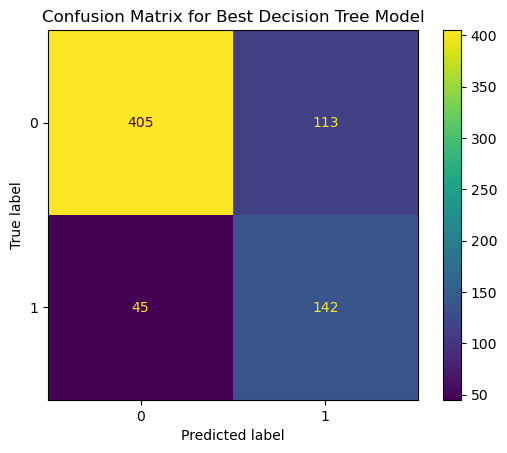

{'Model': 'RandomForestClassifier',
 'Accuracy': 0.7759,
 'Precision': 0.5569,
 'Recall': 0.7594,
 'F1-Score': 0.6425,
 'F2-Score': 0.7079,
 'AUC-ROC': 0.8372,
 'AUC-PR': 0.6215}

In [22]:
# Drop the specified columns
X_train_improved = X_train_resampled.drop(columns=columns_to_remove)
X_val_improved = X_val.drop(columns=columns_to_remove)
X_test_improved = X_test.drop(columns=columns_to_remove)

# Train and evaluate model with improved feature set
rf_model_improved = RandomForestClassifier(
    random_state=42,
    n_estimators=100,        
    max_depth=10,            
    min_samples_split=10,   
    min_samples_leaf=5,      
    class_weight='balanced', 
)

rf_model_improved.fit(X_train_improved, y_train_resampled)
dt_improved_matrics = evaluate_model(rf_model_improved, X_val_improved, y_val)
# predictions
y_pred = rf_model_improved.predict(X_val_improved)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.title('Confusion Matrix for Best Decision Tree Model')
plt.show()

# Display evaluation metrics
dt_improved_matrics

In [23]:
from sklearn.model_selection import GridSearchCV

# initial rf model
rf_inital_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced', # Handles class imbalance
)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 11, 12],
    'min_samples_split': [5, 7, 10],
    'min_samples_leaf': [3, 5, 7, 10],
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_inital_model,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='f1',        # scoring metric
    n_jobs=-1,           
    verbose=1
)

# Fit GridSearchCV on training data
grid_search_rf.fit(X_train_improved, y_train_resampled)

# Print the best parameters and best score 
print("Best parameters found:", grid_search_rf.best_params_)
print("Best score found:", grid_search_rf.best_score_)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found: {'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 150}
Best score found: 0.8199530518729666


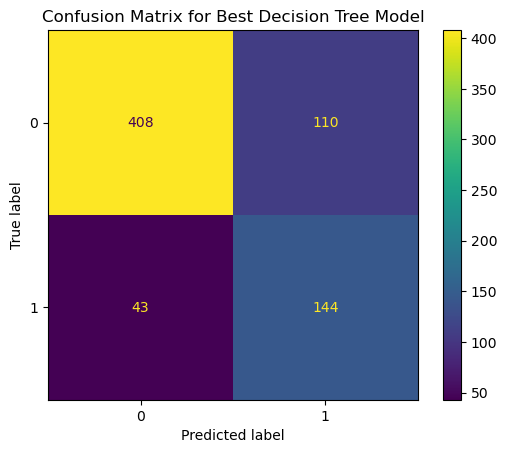

{'Model': 'RandomForestClassifier',
 'Accuracy': 0.783,
 'Precision': 0.5669,
 'Recall': 0.7701,
 'F1-Score': 0.6531,
 'F2-Score': 0.7186,
 'AUC-ROC': 0.8373,
 'AUC-PR': 0.6189}

In [24]:
best_rf_model.fit(X_train_improved, y_train_resampled)

# Evaluate the best trained rf model
best_rf_matrics = evaluate_model(best_rf_model, X_val_improved, y_val)

# Generate predictions
y_pred = best_rf_model.predict(X_val_improved)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.title('Confusion Matrix for Best Decision Tree Model')
plt.show()
best_rf_matrics

In [25]:
# evaluate on the test dataset
evaluate_model(best_rf_model, X_test_improved, y_test)

{'Model': 'RandomForestClassifier',
 'Accuracy': 0.7594,
 'Precision': 0.5352,
 'Recall': 0.7112,
 'F1-Score': 0.6108,
 'F2-Score': 0.6673,
 'AUC-ROC': 0.8301,
 'AUC-PR': 0.6259}

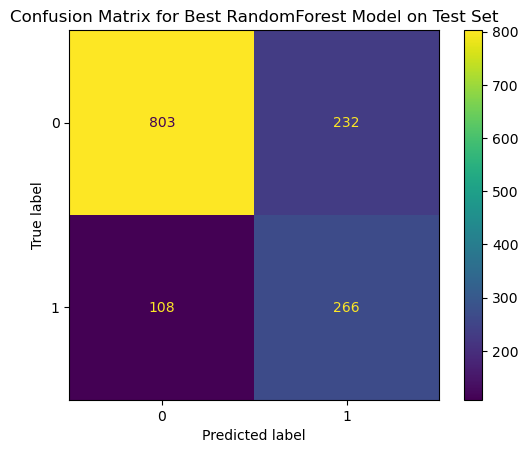

{'Model': 'RandomForestClassifier',
 'Accuracy': 0.7587,
 'Precision': 0.5341,
 'Recall': 0.7112,
 'F1-Score': 0.6101,
 'F2-Score': 0.667,
 'AUC-ROC': 0.8308,
 'AUC-PR': 0.6234}

In [26]:
# train the model on full training set
X_full_train = pd.concat([X_train_improved, X_val_improved])
y_full_train = pd.concat([y_train_resampled, y_val])

# fit the model on training set
best_rf_model.fit(X_full_train, y_full_train)

# Evaluate the model on the test set
best_rf_test_metrics = evaluate_model(best_rf_model, X_test_improved, y_test)

# Generate predictions
y_test_pred = best_rf_model.predict(X_test_improved)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix for Best RandomForest Model on Test Set')
plt.show()

# Display evaluation metrics
best_rf_test_metrics

In [27]:
# save the model
joblib.dump(best_rf_model, '../frontend/model/RandomForestClassifier.pkl')

['../frontend/model/RandomForestClassifier.pkl']